In [0]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


     |████████████████████████████████| 993kB 6.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:

# https://drive.google.com/open?id=1l5Ct50CYl2o3MDKosn-omi2M2CYIdstn

fileId = drive.CreateFile({'id': '1IA66caY-7wYWWVMyINvtaWieAY_8v-FZ'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('orca.zip')  # Save Drive file as a local file

!unzip orca.zip -d ./

detection_dataset.zip
Archive:  orca.zip
   creating: ./detection_dataset/
   creating: ./detection_dataset/train/
   creating: ./detection_dataset/train/neg/
  inflating: ./detection_dataset/train/neg/20180512_1035 SW_0740_0000.png  
  inflating: ./detection_dataset/train/neg/20180512_1035 SW_0796_0000.png  
  inflating: ./detection_dataset/train/neg/20180524_0610 Marys AD16 AK Grey_0273_0000.png  
  inflating: ./detection_dataset/train/neg/20180525_0200 Thumb AK_0263_0000.png  
  inflating: ./detection_dataset/train/neg/20180605_1223_OFF_0544_0000.png  
  inflating: ./detection_dataset/train/neg/20180605_1223_OFF_0552_0000.png  
  inflating: ./detection_dataset/train/neg/20180605_1223_OFF_0553_0000.png  
  inflating: ./detection_dataset/train/neg/20180605_2301_marys_0053_0000.png  
  inflating: ./detection_dataset/train/neg/20180605_2301_marys_0199_0000.png  
  inflating: ./detection_dataset/train/neg/20180829 a_0277_0000.png  
  inflating: ./detection_dataset/train/neg/20180829 a_03

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

Using TensorFlow backend.


In [0]:
train_data_path = 'detection_dataset/train/'
validation_data_path = 'detection_dataset/val/'
test_data_path = 'detection_dataset/test/'

#Parametres
img_width, img_height = 200, 300

nb_train_samples = sum(len(files) for _, _, files in os.walk(train_data_path))
nb_validation_samples = sum(len(files) for _, _, files in os.walk(validation_data_path))
# print(nb_train_samples)
epochs = 100
batch_size = 256

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# K.set_image_dim_ordering('th')

model = Sequential()
model.add(Conv2D(64, (5, 5), padding = 'same', strides=3, input_shape=input_shape))
# model.add(Conv2D(32, (5, 5), padding = 'same', strides=2))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), strides=3, padding = 'same'))
# model.add(Conv2D(32, (5, 5), strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5),  strides=3, padding = 'same'))
# model.add(Conv2D(64, (5, 5),  strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5), strides=3, padding = 'same'))
# model.add(Conv2D(64, (5, 5), strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model.summary()

W0707 11:27:23.479415 140046722774912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 11:27:23.524014 140046722774912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 11:27:23.537709 140046722774912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 11:27:23.572931 140046722774912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0707 11:27:23.586767 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 67, 100, 64)       4864      
_________________________________________________________________
activation_1 (Activation)    (None, 67, 100, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 67, 100, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 34, 64)        102464    
_________________________________________________________________
activation_2 (Activation)    (None, 23, 34, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 34, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 12, 128)        204928    
__________

In [6]:

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='checkpointORCA_adam-{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=0, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=1e-8)

train_datagen = ImageDataGenerator(rescale=1. / 255)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Change the batchsize according to your system RAM
train_batchsize = 256
val_batchsize = 256

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_width, img_height),
    batch_size=val_batchsize,
    class_mode='binary',
shuffle=False)

# validation_generator.reset()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[checkpoint])

# model.save_weights('orca_detection_3.h5')
model.save('OrcaCNN_detection_adam_ccp_lr5_2x3_str3.h5')

Found 29124 images belonging to 2 classes.
Found 10401 images belonging to 2 classes.
Epoch 1/100
113/113 [==============================] - 337s 3s/step - loss: 0.6939 - acc: 0.5063 - val_loss: 0.6913 - val_acc: 0.5274
Epoch 2/100
113/113 [==============================] - 299s 3s/step - loss: 0.6901 - acc: 0.5331 - val_loss: 0.6870 - val_acc: 0.5163
Epoch 3/100
113/113 [==============================] - 294s 3s/step - loss: 0.6739 - acc: 0.5802 - val_loss: 0.6182 - val_acc: 0.7446
Epoch 4/100
113/113 [==============================] - 303s 3s/step - loss: 0.5696 - acc: 0.6875 - val_loss: 0.4775 - val_acc: 0.7771
Epoch 5/100
113/113 [==============================] - 303s 3s/step - loss: 0.4950 - acc: 0.7447 - val_loss: 0.4606 - val_acc: 0.7745
Epoch 6/100
113/113 [==============================] - 305s 3s/step - loss: 0.4443 - acc: 0.7859 - val_loss: 0.4110 - val_acc: 0.8013
Epoch 7/100
113/113 [==============================] - 295s 3s/step - loss: 0.4065 - acc: 0.8141 - val_loss: 0

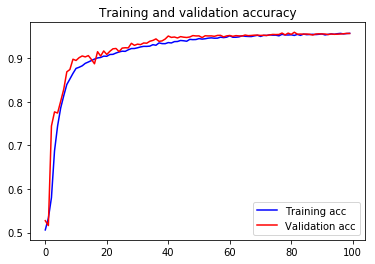

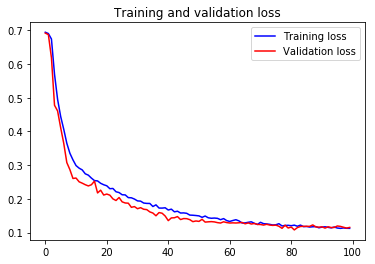

In [7]:
# loss and accuracy curves.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [8]:

from sklearn.metrics import confusion_matrix
import numpy as np

# img_width, img_height = 200, 300
# test_data_path = 'test/'

test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_data_path,
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# model_path = 'checkpointORCA_adam-10-0.13.h5'

# model = load_model(model_path)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predictions[predictions<=0.5] = 0
predictions[predictions>0.5] = 1

predicted_classes = (predictions).astype(np.int)
# print(predictions)
# Get most likely class
# predicted_classes = numpy.argmax(predictions, axis=1)
# print(predicted_classes)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

Found 2082 images belonging to 2 classes.
              precision    recall  f1-score   support

         neg       0.98      0.91      0.95      1031
         pos       0.92      0.98      0.95      1051

    accuracy                           0.95      2082
   macro avg       0.95      0.95      0.95      2082
weighted avg       0.95      0.95      0.95      2082

[[ 942   89]
 [  17 1034]]
acc: 0.9491
sensitivity: 0.9137
specificity: 0.9838
